In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt


from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

from time import time

import os

import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
train=pd.read_csv("train_features.csv")
targets = pd.read_csv("train_targets_scored.csv")
targets_non = pd.read_csv("train_targets_nonscored.csv")
test = pd.read_csv("test_features.csv")

In [4]:
features = train.copy()

In [5]:
common  = ['sig_id',
 'cp_type',
 'cp_time',
 'cp_dose']


genes = list(filter(lambda x : "g-" in x  , list(features)))

cells = list(filter(lambda x : "c-" in x  , list(features)))

In [7]:
# train = df_train
train['type'] = 'train'
# test = df_test
test['type'] = 'test'

In [9]:
X=pd.concat([train,test],axis=0)

In [10]:

X = pd.get_dummies(columns = ['cp_type' , 'cp_dose', 'cp_time'], drop_first =True , data = X)




In [11]:
target  = targets.drop(['sig_id'] , axis =1)

#### PCA:
PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. PCA is mostly used for dense data which is not true in this case we also have a sparse PCA which scikit learn provodes.

#### PCA-Genes

Number of components = 2 and explained variance = 0.3451200081518201
Number of components = 4 and explained variance = 0.4027752993053234
Number of components = 6 and explained variance = 0.4437195013156231
Number of components = 10 and explained variance = 0.5005800992380867
Number of components = 16 and explained variance = 0.5492784988213534
Number of components = 20 and explained variance = 0.5726164606955201
Number of components = 30 and explained variance = 0.6102072945790625
Number of components = 50 and explained variance = 0.6561724495166177
Number of components = 100 and explained variance = 0.7245585504371796
Number of components = 150 and explained variance = 0.7761966938763137
Number of components = 200 and explained variance = 0.8169930052507582
Number of components = 300 and explained variance = 0.8742968685465767
Number of components = 450 and explained variance = 0.9300124276617898
Number of components = 600 and explained variance = 0.9688253065829326


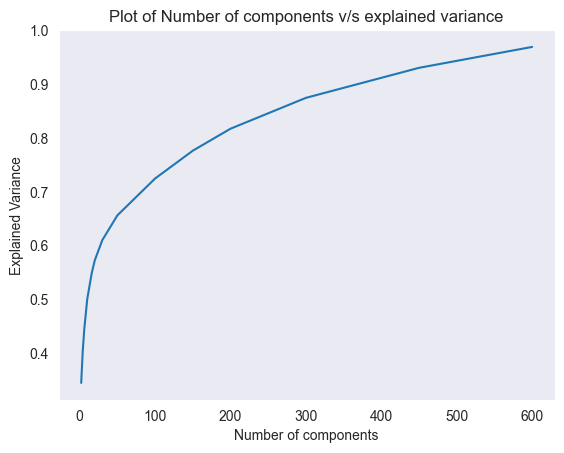

In [12]:
n_comp = [2,4,6,10 ,16,20,30,50,100,150,200,300,450,600] # list containing different values of components
explained = [] # explained variance ratio for each component of PCA
for x in n_comp:
    pca_gene = PCA(n_components=x)
    pca_gene.fit(X[genes])
    explained.append(pca_gene.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,pca_gene.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

At 450 we get satisfactory variance explaied of 92% this helps us reduce the dimensions from 770 to 450 without lossing much information.

#### Cell PCA

Number of components = 1 and explained variance = 0.8499556289846822
Number of components = 2 and explained variance = 0.8611776246972158
Number of components = 4 and explained variance = 0.8746928050653774
Number of components = 6 and explained variance = 0.8827986632139538
Number of components = 8 and explained variance = 0.8895300360862124
Number of components = 10 and explained variance = 0.8953845495023363
Number of components = 16 and explained variance = 0.9080690740388287
Number of components = 20 and explained variance = 0.915202762228596
Number of components = 30 and explained variance = 0.9296310199253178
Number of components = 50 and explained variance = 0.9543855409690012


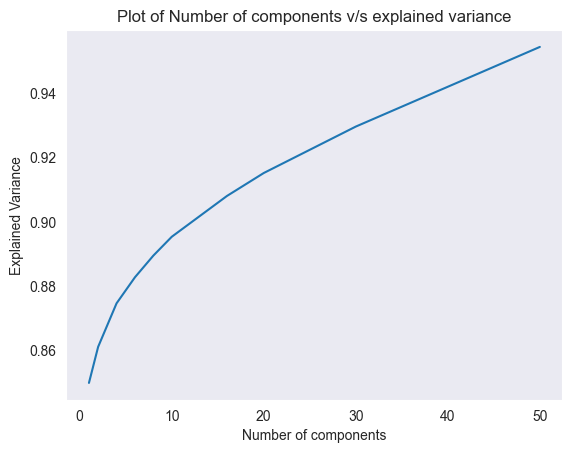

In [13]:
n_comp = [1,2,4,6,8,10,16,20,30,50] # list containing different values of components
explained = [] # explained variance ratio for each component of PCA
for x in n_comp:
    pca_cell = PCA(n_components=x)
    pca_cell.fit(X[cells])
    explained.append(pca_cell.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,pca_cell.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [14]:
#pca_gene data
pca_gene = PCA(n_components=450)
pca_gene_data = pca_gene.fit_transform(X[genes])
inter_pc_gene = pd.DataFrame(data = pca_gene_data)

Pca = X
transformed_genes = [str(i)+str('_gene') for i in list(inter_pc_gene) ]
Pca[transformed_genes] = inter_pc_gene[:]

In [22]:
Pca

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,442_gene,443_gene,444_gene,445_gene,446_gene,447_gene,448_gene,449_gene,PC1_cell,PC2_cell
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,...,-0.737431,0.345136,0.685924,0.408161,-0.102114,0.309576,-0.253113,0.002070,-7.285008,0.608406
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,...,-0.185111,0.179292,0.648172,0.390370,0.398366,0.507512,0.167013,-0.487705,-7.417466,-0.756891
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,...,0.288358,-0.437287,-0.644713,0.189664,0.199827,-0.724132,-0.183437,0.638465,-2.247580,0.226876
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,...,0.948073,-0.149672,0.203560,0.347564,0.066683,-0.413408,-0.256726,0.016126,13.943314,7.308953
4,id_001626bd3,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,...,0.285406,0.732124,-0.452580,0.650512,-0.013289,-0.177429,0.888363,1.152009,-6.307752,0.262643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,id_ff7004b87,0.4571,-0.5743,3.3930,-0.6202,0.8557,1.6240,0.0640,-0.6316,-1.1990,...,0.874008,0.270574,-0.242128,0.674224,0.494085,0.135477,-0.259213,0.062976,-9.634578,0.095053
3978,id_ff925dd0d,-0.5885,-0.2548,2.5850,0.3456,0.4401,0.3107,-0.7437,-0.0143,0.2615,...,0.267198,-0.112300,0.531953,0.121094,0.156674,-0.727785,-0.186203,-0.528252,-6.223064,-0.265698
3979,id_ffb710450,-0.3985,-0.1554,0.2677,-0.6813,0.0152,0.4791,-0.0166,0.7501,0.0346,...,0.662808,-0.977768,0.113761,-0.503795,-0.243761,0.056976,-0.113041,-0.173510,-11.960831,0.349894
3980,id_ffbb869f2,-1.0960,-1.7750,-0.3977,1.0160,-1.3350,-0.2207,-0.3611,-1.3020,1.0150,...,-0.870801,0.044858,0.136333,0.020540,0.330687,0.688362,0.606902,0.227307,-4.744050,-0.107789


In [15]:
pca_cell = PCA(n_components=2)
pca_cell_data = pca_cell.fit_transform(X[cells])
inter_pc_cell = pd.DataFrame(data = pca_cell_data
             , columns = ['PC1', 'PC2'])
Pca['PC1_cell'] = inter_pc_cell['PC1']
Pca['PC2_cell'] = inter_pc_cell['PC2']

In [23]:
Pca

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,442_gene,443_gene,444_gene,445_gene,446_gene,447_gene,448_gene,449_gene,PC1_cell,PC2_cell
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,...,-0.737431,0.345136,0.685924,0.408161,-0.102114,0.309576,-0.253113,0.002070,-7.285008,0.608406
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,...,-0.185111,0.179292,0.648172,0.390370,0.398366,0.507512,0.167013,-0.487705,-7.417466,-0.756891
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,...,0.288358,-0.437287,-0.644713,0.189664,0.199827,-0.724132,-0.183437,0.638465,-2.247580,0.226876
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,...,0.948073,-0.149672,0.203560,0.347564,0.066683,-0.413408,-0.256726,0.016126,13.943314,7.308953
4,id_001626bd3,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,...,0.285406,0.732124,-0.452580,0.650512,-0.013289,-0.177429,0.888363,1.152009,-6.307752,0.262643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,id_ff7004b87,0.4571,-0.5743,3.3930,-0.6202,0.8557,1.6240,0.0640,-0.6316,-1.1990,...,0.874008,0.270574,-0.242128,0.674224,0.494085,0.135477,-0.259213,0.062976,-9.634578,0.095053
3978,id_ff925dd0d,-0.5885,-0.2548,2.5850,0.3456,0.4401,0.3107,-0.7437,-0.0143,0.2615,...,0.267198,-0.112300,0.531953,0.121094,0.156674,-0.727785,-0.186203,-0.528252,-6.223064,-0.265698
3979,id_ffb710450,-0.3985,-0.1554,0.2677,-0.6813,0.0152,0.4791,-0.0166,0.7501,0.0346,...,0.662808,-0.977768,0.113761,-0.503795,-0.243761,0.056976,-0.113041,-0.173510,-11.960831,0.349894
3980,id_ffbb869f2,-1.0960,-1.7750,-0.3977,1.0160,-1.3350,-0.2207,-0.3611,-1.3020,1.0150,...,-0.870801,0.044858,0.136333,0.020540,0.330687,0.688362,0.606902,0.227307,-4.744050,-0.107789


In [24]:
transformed_genes

['0_gene',
 '1_gene',
 '2_gene',
 '3_gene',
 '4_gene',
 '5_gene',
 '6_gene',
 '7_gene',
 '8_gene',
 '9_gene',
 '10_gene',
 '11_gene',
 '12_gene',
 '13_gene',
 '14_gene',
 '15_gene',
 '16_gene',
 '17_gene',
 '18_gene',
 '19_gene',
 '20_gene',
 '21_gene',
 '22_gene',
 '23_gene',
 '24_gene',
 '25_gene',
 '26_gene',
 '27_gene',
 '28_gene',
 '29_gene',
 '30_gene',
 '31_gene',
 '32_gene',
 '33_gene',
 '34_gene',
 '35_gene',
 '36_gene',
 '37_gene',
 '38_gene',
 '39_gene',
 '40_gene',
 '41_gene',
 '42_gene',
 '43_gene',
 '44_gene',
 '45_gene',
 '46_gene',
 '47_gene',
 '48_gene',
 '49_gene',
 '50_gene',
 '51_gene',
 '52_gene',
 '53_gene',
 '54_gene',
 '55_gene',
 '56_gene',
 '57_gene',
 '58_gene',
 '59_gene',
 '60_gene',
 '61_gene',
 '62_gene',
 '63_gene',
 '64_gene',
 '65_gene',
 '66_gene',
 '67_gene',
 '68_gene',
 '69_gene',
 '70_gene',
 '71_gene',
 '72_gene',
 '73_gene',
 '74_gene',
 '75_gene',
 '76_gene',
 '77_gene',
 '78_gene',
 '79_gene',
 '80_gene',
 '81_gene',
 '82_gene',
 '83_gene',
 '

In [16]:
features_final_pca = transformed_genes + ['PC1_cell', 'PC2_cell', 'cp_type_trt_cp', 'cp_dose_D2', 'cp_time_48', 'cp_time_72']

In [17]:
x_pca = Pca[Pca['type']  == 'train'][features_final_pca].to_numpy()
y_pca = target.to_numpy()
x_test_pca = Pca[Pca['type']  == 'test'][features_final_pca].to_numpy()

In [26]:
Pca[Pca['type']  == 'train'][features_final_pca]

,0_gene,1_gene,2_gene,3_gene,4_gene,5_gene,6_gene,7_gene,8_gene,9_gene,...,446_gene,447_gene,448_gene,449_gene,PC1_cell,PC2_cell,cp_type_trt_cp,cp_dose_D2,cp_time_48,cp_time_72
0,-8.191034,-0.488171,-3.967531,6.922384,3.426205,-4.939661,-4.021628,3.108679,2.719793,-2.409790,...,-0.102114,0.309576,-0.253113,0.002070,-7.285008,0.608406,True,False,False,False
1,-6.531898,3.288575,9.420454,-0.574416,-2.009119,4.779335,2.585963,1.996410,0.305797,1.425768,...,0.398366,0.507512,0.167013,-0.487705,-7.417466,-0.756891,True,False,False,True
2,-1.669338,2.297153,-0.782439,-7.036332,-1.434309,-1.718393,2.841783,-0.774921,-1.731602,-4.942424,...,0.199827,-0.724132,-0.183437,0.638465,-2.247580,0.226876,True,False,True,False
3,9.268336,-4.829223,-1.752497,-11.326041,-1.178114,-10.384509,5.975082,-2.337153,-0.157029,4.973513,...,0.066683,-0.413408,-0.256726,0.016126,13.943314,7.308953,True,False,True,False
4,-7.185918,0.111345,8.256769,-7.394481,-0.632287,-4.333922,-1.741191,0.646712,-6.767274,5.830809,...,-0.013289,-0.177429,0.888363,1.152009,-6.307752,0.262643,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,-6.018252,2.927708,-0.626854,-3.892167,-0.773846,-0.904329,1.530115,0.114904,2.579791,-1.943156,...,1.128497,-0.536156,0.411761,-1.487542,-6.398104,0.103702,True,True,False,False
23810,-4.952320,-0.545998,-1.626794,0.221292,4.770532,-0.212782,0.308716,-2.716076,-1.425002,0.317476,...,0.019797,0.284595,0.109197,-1.504216,-4.029873,-1.008950,True,True,False,False
23811,-6.522456,-1.372804,-0.831251,0.531181,-0.837211,-1.502036,0.003087,2.996017,-1.024630,-0.891798,...,0.398088,0.146681,0.374750,0.352222,-8.302736,0.451245,False,True,True,False
23812,7.535654,-20.646006,-1.614500,12.610356,-8.006035,-0.190804,-3.018045,5.666979,7.751794,7.323835,...,-0.262753,0.359408,-0.062247,0.016960,-7.838803,0.176882,True,False,False,False
